In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
# f = 5 #Hz
# sigma = 0.5
Ts = 0.001
n = 50
# t=np.arange(-2,2,Ts)
# xf = np.linspace(0.0, 1.0/(2.0*Ts), t.size)

In [3]:
#https://www.kaggle.com/berkeley-biosense/synchronized-brainwave-dataset
data  = np.array([-203.0, -202.0, -196.0, -185.0, -163.0, -137.0, -110.0, -70.0, -41.0, -28.0, -6.0, 35.0, 84.0, 105.0, 134.0, 171.0, 221.0, 233.0, 226.0, 242.0, 247.0, 221.0, 209.0, 217.0, 228.0, 205.0, 165.0, 155.0, 194.0, 224.0, 243.0, 258.0, 261.0, 261.0, 257.0, 266.0, 280.0, 250.0, 186.0, 131.0, 120.0, 123.0, 102.0, 60.0, 17.0, -19.0, -4.0, 6.0, -34.0, -70.0, -84.0, -89.0, -99.0, -106.0, -102.0, -109.0, -132.0, -151.0, -185.0, -211.0, -209.0, -194.0, -212.0, -231.0, -225.0, -205.0, -193.0, -163.0, -131.0, -108.0, -81.0, -56.0, -38.0, -24.0, -23.0, -22.0, -4.0, 8.0, 23.0, 54.0, 91.0, 121.0, 129.0, 131.0, 146.0, 168.0, 219.0, 275.0, 310.0, 308.0, 294.0, 296.0, 306.0, 296.0, 253.0, 208.0, 188.0, 185.0, 181.0, 170.0, 131.0, 116.0, 137.0, 129.0, 75.0, 66.0, 75.0, 77.0, 82.0, 104.0, 134.0, 121.0, 84.0, 49.0, 25.0, 0.0, -27.0, -52.0, -71.0, -94.0, -115.0, -131.0, -142.0, -162.0, -186.0, -209.0, -225.0, -204.0, -181.0, -165.0, -153.0, -145.0, -117.0, -91.0, -90.0, -86.0, -72.0, -73.0, -74.0, -60.0, -83.0, -125.0, -117.0, -60.0, -10.0, 17.0, 20.0, 9.0, 20.0, 50.0, 80.0, 91.0, 100.0, 120.0, 147.0, 151.0, 156.0, 176.0, 180.0, 165.0, 179.0, 208.0, 200.0, 151.0, 121.0, 135.0, 145.0, 124.0, 92.0, 64.0, 53.0, 71.0, 96.0, 99.0, 82.0, 36.0, -7.0, -36.0, -60.0, -67.0, -67.0, -81.0, -92.0, -83.0, -65.0, -74.0, -109.0, -146.0, -180.0, -200.0, -189.0, -155.0, -138.0, -131.0, -145.0, -163.0, -161.0, -145.0, -134.0, -122.0, -102.0, -73.0, -74.0, -72.0, -72.0, -97.0, -117.0, -109.0, -76.0, -27.0, 8.0, 8.0, 25.0, 60.0, 87.0, 90.0, 68.0, 58.0, 100.0, 149.0, 170.0, 170.0, 170.0, 166.0, 170.0, 192.0, 196.0, 192.0, 203.0, 218.0, 229.0, 227.0, 244.0, 265.0, 261.0, 253.0, 251.0, 262.0, 282.0, 283.0, 268.0, 256.0, 249.0, 224.0, 171.0, 130.0, 123.0, 131.0, 129.0, 113.0, 99.0, 85.0, 55.0, 44.0, 61.0, 68.0, 52.0, 29.0, 35.0, 48.0, 73.0, 98.0, 96.0, 73.0, 58.0, 22.0, -28.0, -55.0, -57.0, -66.0, -97.0, -134.0, -135.0, -137.0, -124.0, -83.0, -21.0, 40.0, 88.0, 124.0, 162.0, 194.0, 200.0, 189.0, 151.0, 119.0, 99.0, 66.0, 55.0, 74.0, 72.0, 37.0, -6.0, -33.0, -13.0, -8.0, -46.0, -76.0, -54.0, -25.0, -34.0, -41.0, -33.0, -40.0, -67.0, -67.0, -57.0, -52.0, -37.0, -6.0, 23.0, 19.0, 11.0, 39.0, 73.0, 83.0, 91.0, 101.0, 115.0, 124.0, 115.0, 86.0, 49.0, 1.0, -44.0, -69.0, -81.0, -59.0, -18.0, -13.0, -37.0, -53.0, -45.0, -19.0, 26.0, 52.0, 56.0, 69.0, 113.0, 149.0, 163.0, 170.0, 162.0, 129.0, 92.0, 76.0, 68.0, 49.0, 28.0, 6.0, -29.0, -39.0, -24.0, -41.0, -76.0, -99.0, -102.0, -89.0, -59.0, -27.0, -29.0, -45.0, -39.0, -13.0, 1.0, -12.0, -34.0, -28.0, -24.0, -49.0, -78.0, -103.0, -114.0, -131.0, -122.0, -82.0, -56.0, -49.0, -23.0, 11.0, 52.0, 64.0, 48.0, 48.0, 61.0, 65.0, 60.0, 80.0, 106.0, 121.0, 105.0, 87.0, 99.0, 113.0, 122.0, 131.0, 134.0, 152.0, 176.0, 195.0, 215.0, 235.0, 241.0, 217.0, 211.0, 221.0, 218.0, 181.0, 160.0, 156.0, 140.0, 122.0, 93.0, 65.0, 66.0, 43.0, 16.0, -4.0, -20.0, -37.0, -57.0, -70.0, -81.0, -83.0, -86.0, -87.0, -90.0, -103.0, -121.0, -139.0, -149.0, -136.0, -120.0, -125.0, -139.0, -151.0, -158.0, -169.0, -167.0, -120.0, -72.0, -52.0, -38.0, -9.0, 23.0, 59.0, 71.0, 59.0, 58.0, 58.0, 41.0, 25.0, 16.0, 7.0, -2.0, 32.0, 81.0, 107.0, 109.0, 103.0, 108.0, 133.0, 150.0, 148.0, 136.0, 128.0, 107.0, 102.0, 116.0, 113.0, 81.0, 9.0, -39.0, -43.0, -34.0, -58.0, -90.0, -103.0, -105.0, -115.0, -117.0, -107.0, -86.0, -75.0, -86.0, -103.0, -124.0, -130.0, -106.0, -104.0, -104.0, -91.0, -99.0, -117.0, -110.0, -76.0, -55.0, -77.0, -113.0, -120.0, -104.0, -97.0, -61.0, -17.0, -13.0, -51.0, -77.0, -62.0, -22.0, 20.0, 44.0, 67.0])

In [4]:
sampleSize = data.size

In [5]:
data = (data-np.mean(data))/np.std(data)
xDataTime = np.linspace(0,data.size*Ts,data.size) 

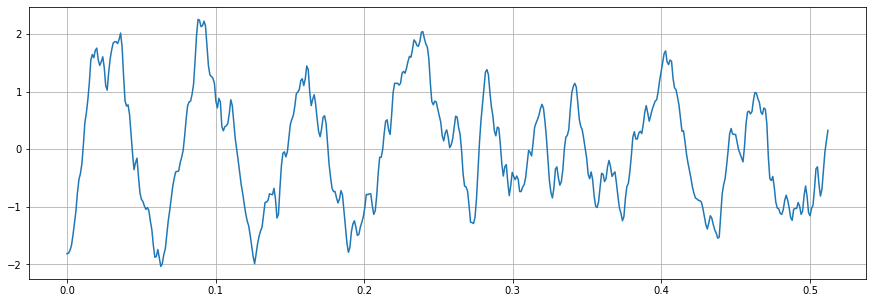

In [6]:
plt.plot(xDataTime,data)
plt.grid()
plt.show()

In [7]:
xData = np.abs(np.fft.rfft(data))
xFreq = np.fft.rfftfreq(xData.size*2-1,d=Ts)

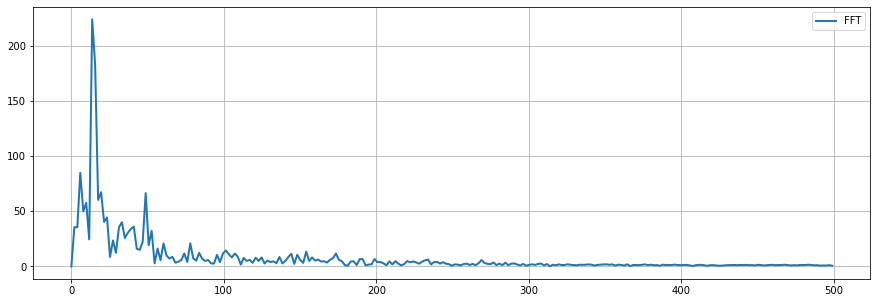

In [8]:
# Plotinf FFT of raw Data
plt.plot(np.abs(xFreq),np.abs(xData),linewidth=2,label='FFT')
plt.legend()
plt.grid()
plt.show()

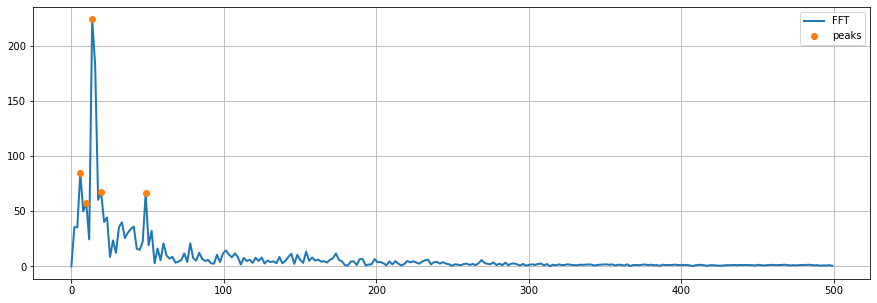

In [9]:
# find the needed frequencies
peaks, _ = find_peaks(xData, prominence=1)
peaks = sorted(list(set(xData[peaks])),reverse=True)
peaks = peaks[:5]
temp=[]# index of peak
for ii in peaks:
    temp.append(np.where(xData==ii)[0].tolist()[0])
# remove the negative frequencies 
ind = [ii for ii,jj in enumerate(xFreq[temp]) if jj< 0]
for ii in ind:
    temp.pop(ii)
# ploting the peak
plt.plot(np.abs(xFreq),np.abs(xData),linewidth=2,label='FFT')
plt.plot(xFreq[temp],xData[temp],'o',label='peaks')
plt.legend()
plt.grid()
plt.show()

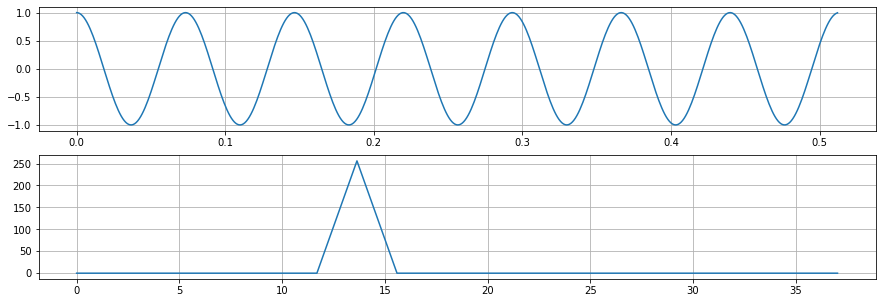

In [18]:
# Sine wave and its FFT
# t = np.linspace(-2/xFreq[temp[0]],2/xFreq[temp[0]],sampleSize)#np.arange(0,0.01,0.0001)
t = xDataTime
ySine = (np.exp(-1j*2*np.pi*t*xFreq[temp[0]]))
plt.subplot(211)
plt.plot(t,np.real(ySine))
plt.grid()
plt.subplot(212)
ySineFFT = np.fft.rfft(np.real(ySine))
ySinF = np.fft.rfftfreq(ySineFFT.size*2-1,d=Ts)
plt.plot((ySinF[:20]),np.abs(ySineFFT[:20]))
# plt.plot(np.abs(ySinF),np.abs(ySineFFT))
plt.grid()
plt.show()

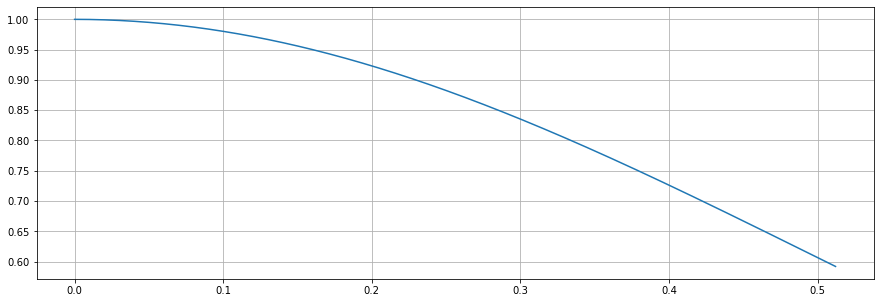

In [11]:
# Gaussian function and its FFT
sigma = 0.5
# tt = np.linspace(-0.5,0.5,int(1/0.01))
yGaus = np.exp(-0.5*np.square(t/sigma))
plt.plot(t,yGaus)
plt.grid()
plt.show()

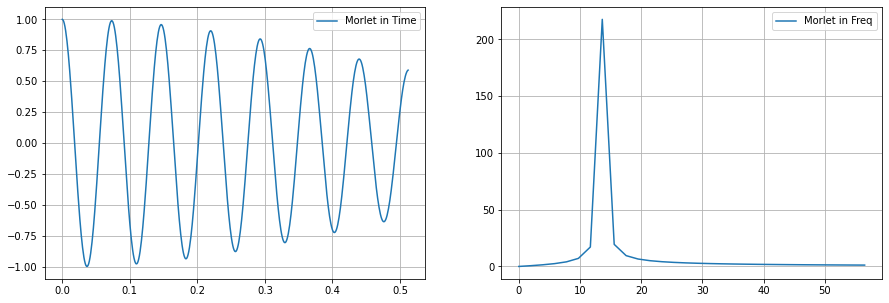

In [20]:
# Morlet Wavelet plot
y = np.multiply(ySine,yGaus)
plt.subplot(121)
plt.plot(t,np.real(y),label='Morlet in Time')
plt.legend()
plt.grid()
plt.subplot(122)
yFFT = np.fft.rfft(np.real(y))
yf = np.fft.rfftfreq(yFFT.size*2-1,d=(Ts))
plt.plot(np.abs(yf[:n]),np.abs(yFFT[:n]),label='Morlet in Freq')
plt.legend()
plt.grid()
plt.show()

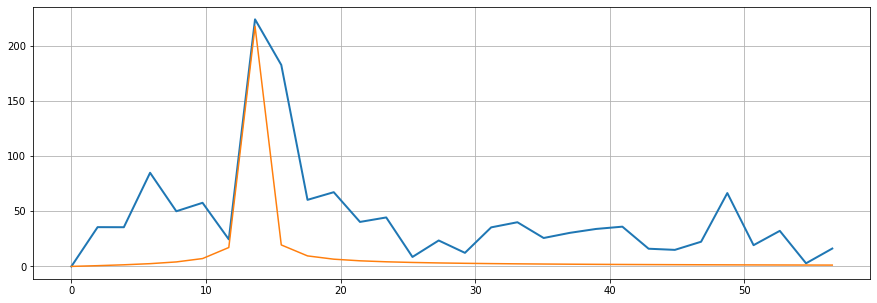

In [21]:
# compare the Morlet and Raw data
n = 30
plt.plot(np.abs(xFreq[:n]),np.abs(xData[:n]),linewidth=2,label='FFT')
plt.plot(np.abs(yf[:n]),np.abs(yFFT[:n]))
plt.grid()
plt.show()

In [22]:
# Find the needed signal 
sig = np.multiply(yFFT,xData)
ySig = np.fft.irfft(sig)
ySig = (ySig-np.mean(ySig))/np.std(ySig)

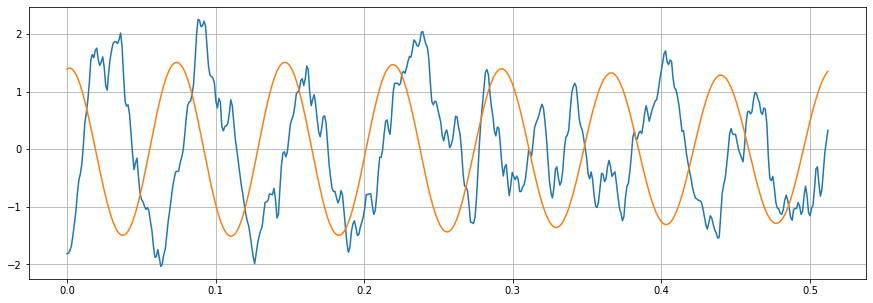

In [23]:
plt.plot(xDataTime,data,label='Raw Signal')
plt.plot(t,ySig,label='Filtered signal')
plt.grid()
plt.show()